In [35]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeRegressor

import os
from data import processing_data
# Loading our dataset

data_path =  "dataset/movies_data_processed_v4.csv"
df = pd.read_csv(data_path)
df.head()

,genres,rating,no_of_votes,meta_score,release_date,gross,budget,countries,log_budget,log_no_of_votes,log_gross,log_gross_bin
0,"Martial Arts, Action, Comedy",5.3,6800,34.0,2025.0,17235040.0,18000000.0,United States,16.705882,8.824825,16.662455,3
1,"Action, Drama, Romance, Thriller, Western",6.5,107000,49.0,1995.0,18636537.0,32000000.0,"United States, Japan",17.281246,11.580593,16.740635,3
2,"Animal Adventure, Computer Animation, Fairy Ta...",7.8,200000,73.0,2022.0,481757663.0,90000000.0,"United States, Japan",18.315320,12.206078,19.992952,9
3,"Sci-Fi Epic, Space Sci-Fi, Action, Adventure, ...",7.6,524000,52.0,1997.0,263920180.0,26000000.0,"France, United Kingdom",17.073607,13.169249,19.391157,8
4,"Sci-Fi Epic, Superhero, Urban Adventure, Actio...",7.4,195000,82.0,1978.0,300478449.0,55000000.0,"United States, United Kingdom, Switzerland, Pa...",17.822844,12.180760,19.520887,8


| Siêu tham số           | Ý nghĩa                                                                 | Giá trị phổ biến / Mặc định       | Ảnh hưởng đến mô hình                                                        |
|------------------------|------------------------------------------------------------------------|-----------------------------------|--------------------------------------------------------------------------------|
| `criterion`            | Hàm mất mát dùng để chia nhánh                                         | `'squared_error'`, `'friedman_mse'`, `'absolute_error'`, `'poisson'` | Ảnh hưởng đến cách đo lỗi khi chia node                                       |
| `splitter`             | Chiến lược chọn điểm chia                                              | `'best'`, `'random'`              | `best` chọn chia tốt nhất; `random` tạo tính ngẫu nhiên                      |
| `max_depth`            | Độ sâu tối đa của cây                                                  | `None`, số nguyên (ví dụ: 5, 10)  | Giới hạn này tránh overfitting, giảm độ phức tạp                             |
| `min_samples_split`    | Số mẫu tối thiểu để chia một node                                      | `2`, `5`, `10`                    | Giá trị cao giúp cây tổng quát hơn                                            |
| `min_samples_leaf`     | Số mẫu tối thiểu tại một lá                                            | `1`, `3`, `5`                     | Tăng để tránh node chứa quá ít mẫu, giảm overfitting                         |
| `max_features`         | Số lượng đặc trưng xem xét khi chia node                              | `'auto'`, `'sqrt'`, `'log2'`, `None` | Giới hạn này làm cây bớt phức tạp, tăng tính ngẫu nhiên nếu không là `None` |
| `max_leaf_nodes`       | Số lượng node lá tối đa                                                | `None`, số nguyên                 | Giới hạn số node lá để kiểm soát độ phức tạp                                 |
| `min_weight_fraction_leaf` | Tỷ lệ trọng số tối thiểu của một lá                                 | `0.0`–`0.5`                       | Dùng khi dữ liệu có trọng số; tránh tạo lá quá nhỏ                           |
| `random_state`         | Hạt giống ngẫu nhiên                                                   | `None` hoặc số nguyên             | Giúp tái tạo kết quả                                                          |
| `ccp_alpha`            | Hệ số cắt tỉa cây theo chi phí phức tạp (pruning)                     | `0.0` trở lên                     | Tăng giá trị này giúp giảm overfitting bằng cách cắt bớt node phụ            |


| Siêu tham số           | Ý nghĩa                                                                 | Giá trị phổ biến / Mặc định       | Ảnh hưởng đến mô hình                                                        |
|------------------------|------------------------------------------------------------------------|-----------------------------------|--------------------------------------------------------------------------------|
| `n_estimators`         | Số lượng cây trong rừng                                                | `[50, 100, 200, 300]` (mặc định: 100) | Tăng số lượng cây giúp mô hình ổn định hơn nhưng huấn luyện lâu hơn         |
| `max_depth`            | Độ sâu tối đa của cây                                                  | `[None, 5, 10, 15]`               | Giới hạn độ sâu tránh overfitting; `None` cho phép cây phát triển tối đa    |
| `min_samples_split`    | Số mẫu tối thiểu để chia một node                                      | `[2, 5, 10]`                      | Giá trị lớn làm cây bớt phức tạp, tránh chia nhỏ quá mức                     |
| `min_samples_leaf`     | Số mẫu tối thiểu tại một node lá                                       | `[1, 3, 5]`                       | Tăng giá trị giúp cây tổng quát hơn, giảm overfitting                        |
| `max_features`         | Số lượng đặc trưng được xét tại mỗi lần chia node                      | `['sqrt', 'log2', None]`         | Tăng tính ngẫu nhiên, giúp đa dạng hóa cây và giảm overfitting               |
| `bootstrap`            | Có sử dụng lấy mẫu có hoàn lại không                                   | `[True, False]`                  | `True` giúp đa dạng hóa cây (giảm overfitting), `False` dùng toàn bộ dữ liệu |
| `criterion`            | Hàm mất mát để đánh giá chất lượng node                               | `['squared_error', 'absolute_error']` | `squared_error` nhạy với outlier; `absolute_error` bền vững hơn với outlier  |
| `max_leaf_nodes`       | Số lượng node lá tối đa (giới hạn cấu trúc cây)                        | `None` hoặc số nguyên dương       | Giới hạn này giúp kiểm soát độ phức tạp mô hình                              |
| `n_jobs`               | Số luồng CPU sử dụng để train song song                                | `-1` (tất cả CPU)                | Tăng tốc độ huấn luyện mô hình                                               |
| `random_state`         | Hạt giống ngẫu nhiên cho reproducibility                               | `42`, hoặc số bất kỳ             | Giúp kết quả có thể lặp lại khi huấn luyện nhiều lần                         |



 Fold 1
Fitting 5 folds for each of 864 candidates, totalling 4320 fits
 Best hyperparameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Training Metrics
R2 score: 0.7719
MAE: 53,428,436.3048
MAPE: 6.06%
Test Metrics
R2 score: 0.6500
MAE: 67,279,266.8779
MAPE: 72.82%


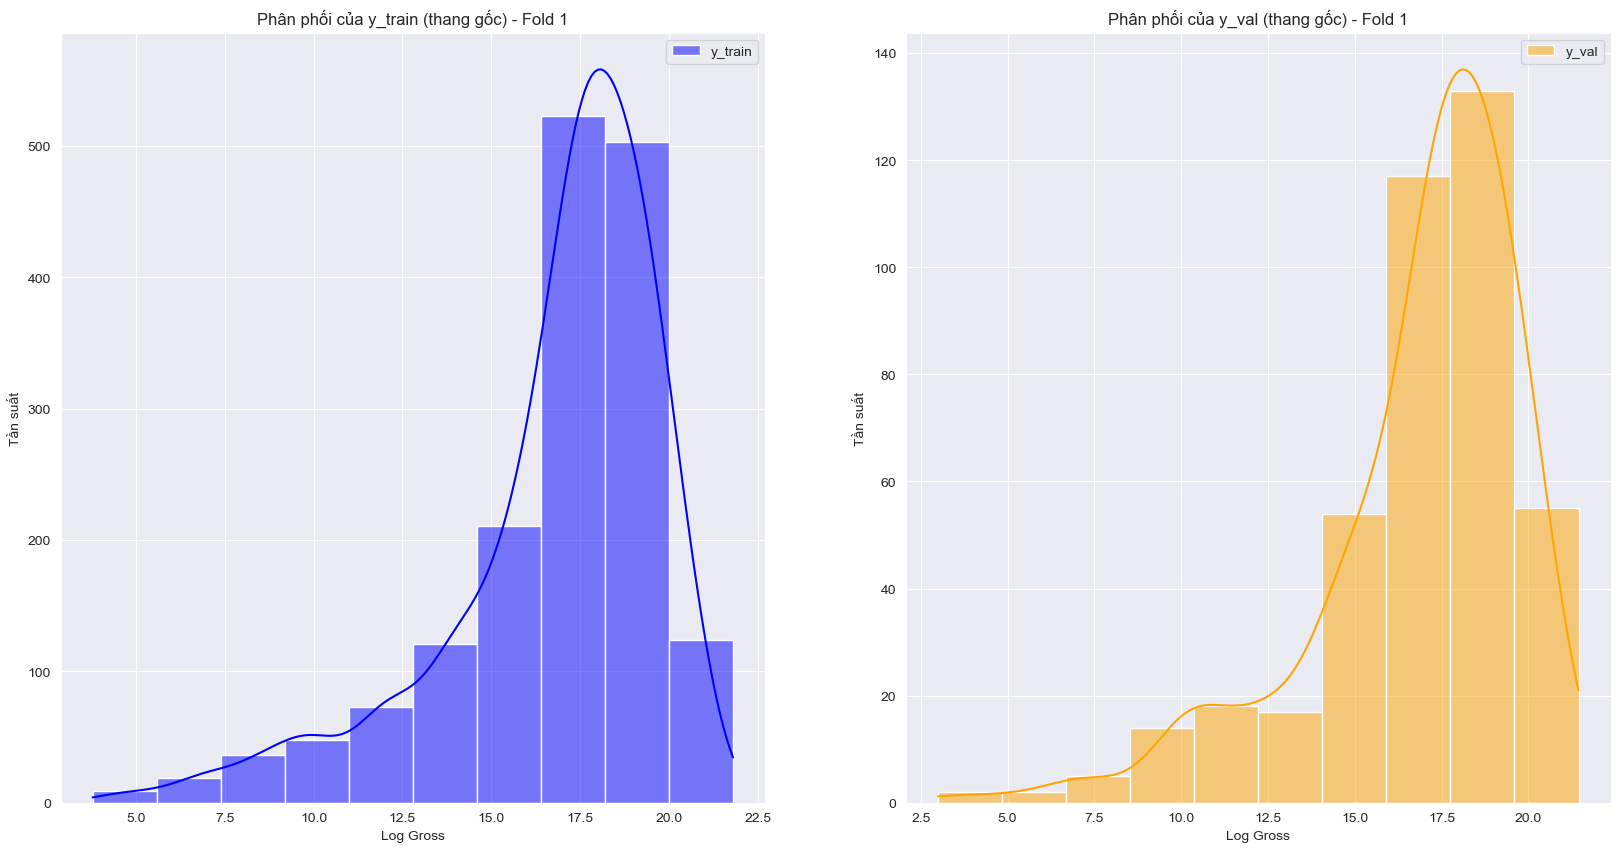

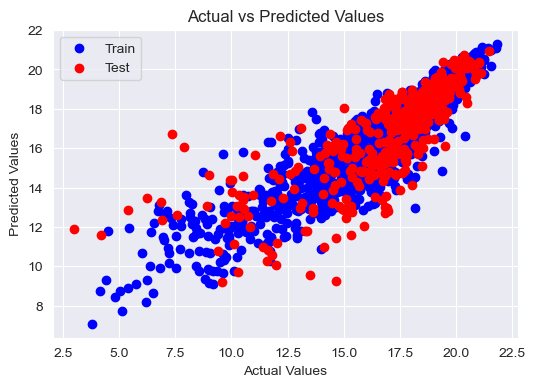

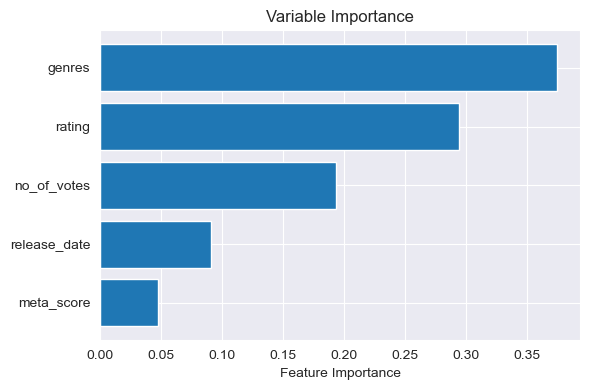


 Fold 2
Fitting 5 folds for each of 864 candidates, totalling 4320 fits
 Best hyperparameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Training Metrics
R2 score: 0.7490
MAE: 54,815,068.6155
MAPE: 12.28%
Test Metrics
R2 score: 0.5608
MAE: 74,548,768.1560
MAPE: 104.46%


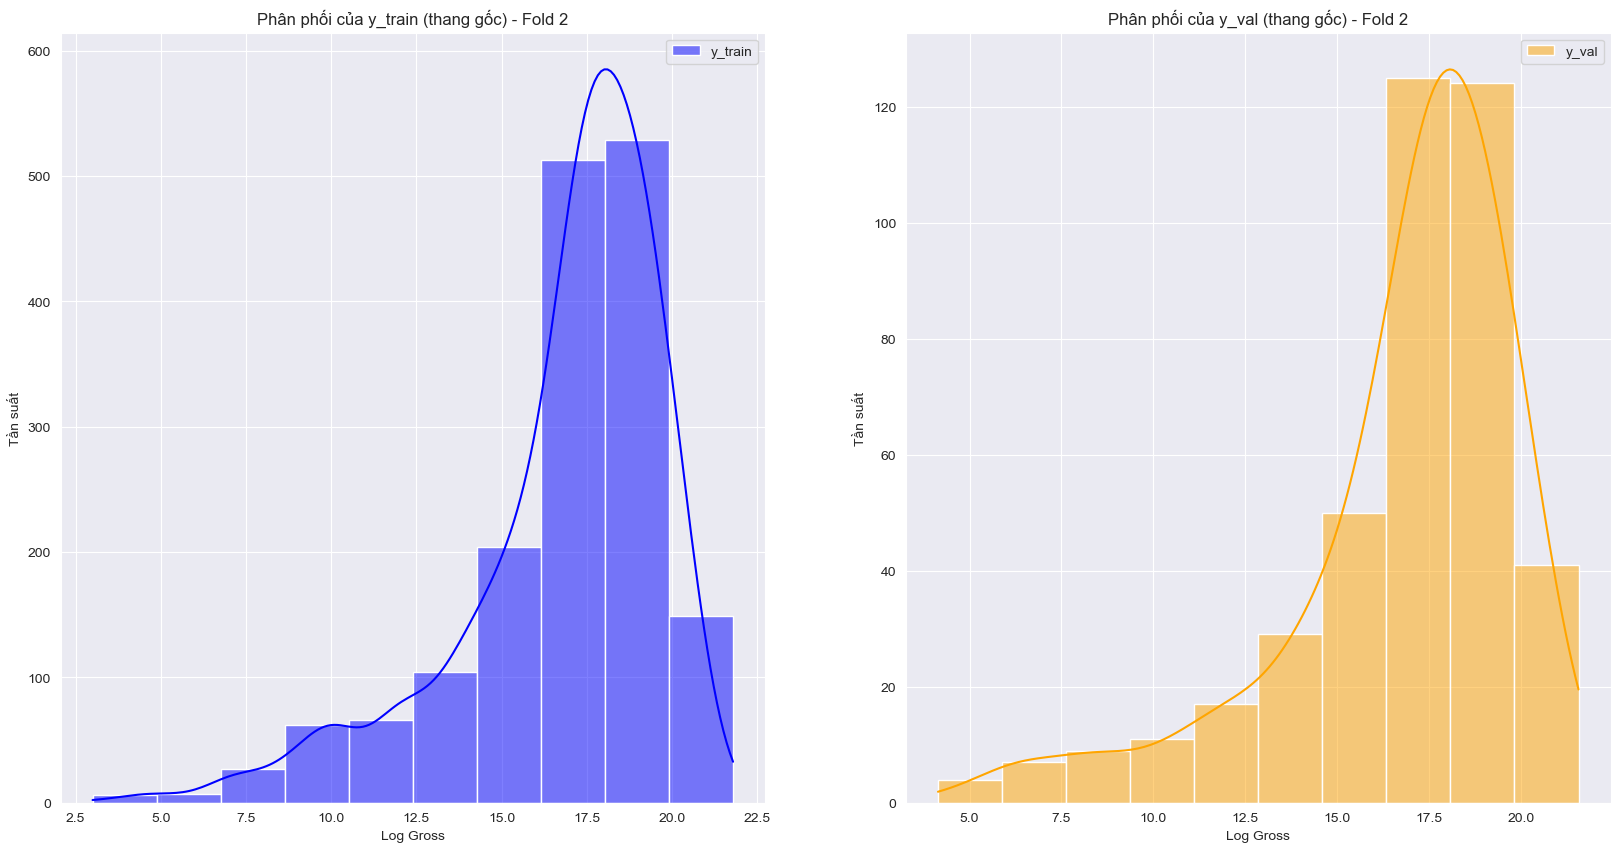

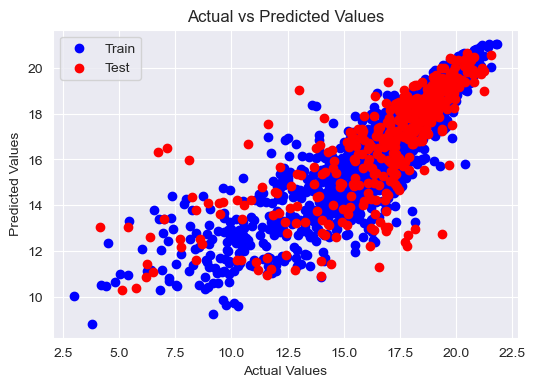

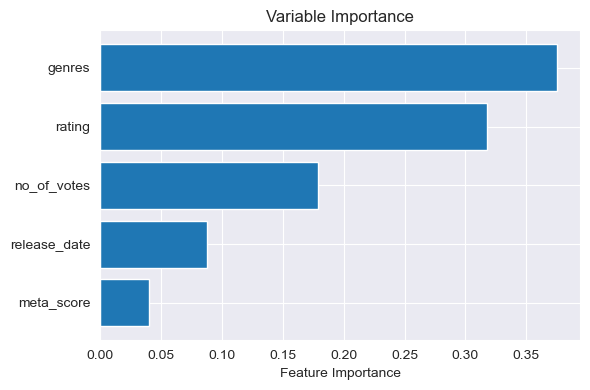


 Fold 3
Fitting 5 folds for each of 864 candidates, totalling 4320 fits
 Best hyperparameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Training Metrics
R2 score: 0.8070
MAE: 43,535,889.4935
MAPE: 4.88%
Test Metrics
R2 score: 0.6112
MAE: 80,029,113.4970
MAPE: 38.57%


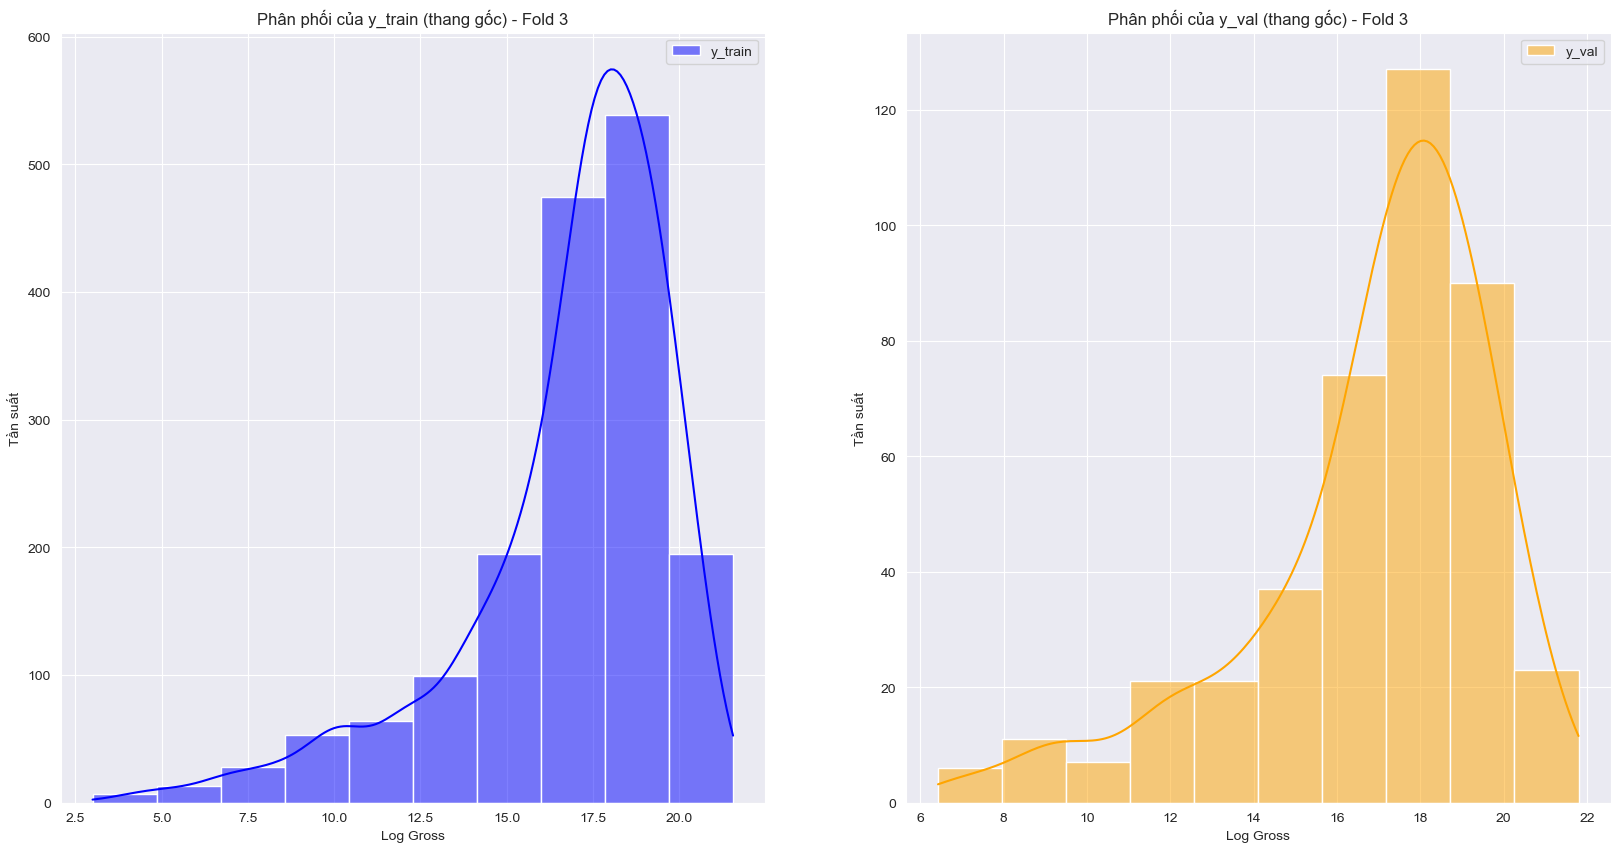

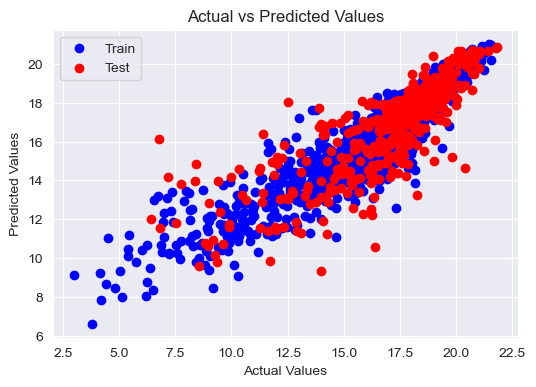

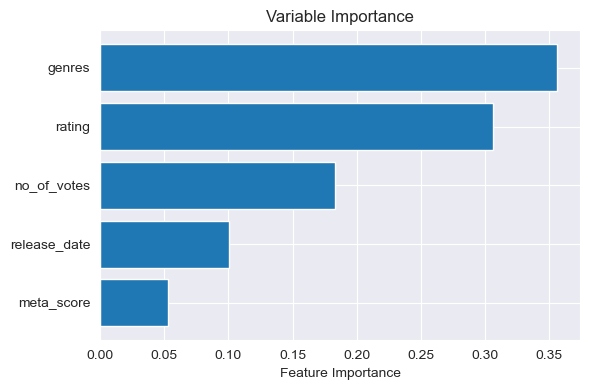


 Fold 4
Fitting 5 folds for each of 864 candidates, totalling 4320 fits
 Best hyperparameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Training Metrics
R2 score: 0.7439
MAE: 56,245,230.4488
MAPE: 14.13%
Test Metrics
R2 score: 0.6382
MAE: 68,289,454.9035
MAPE: 159.32%


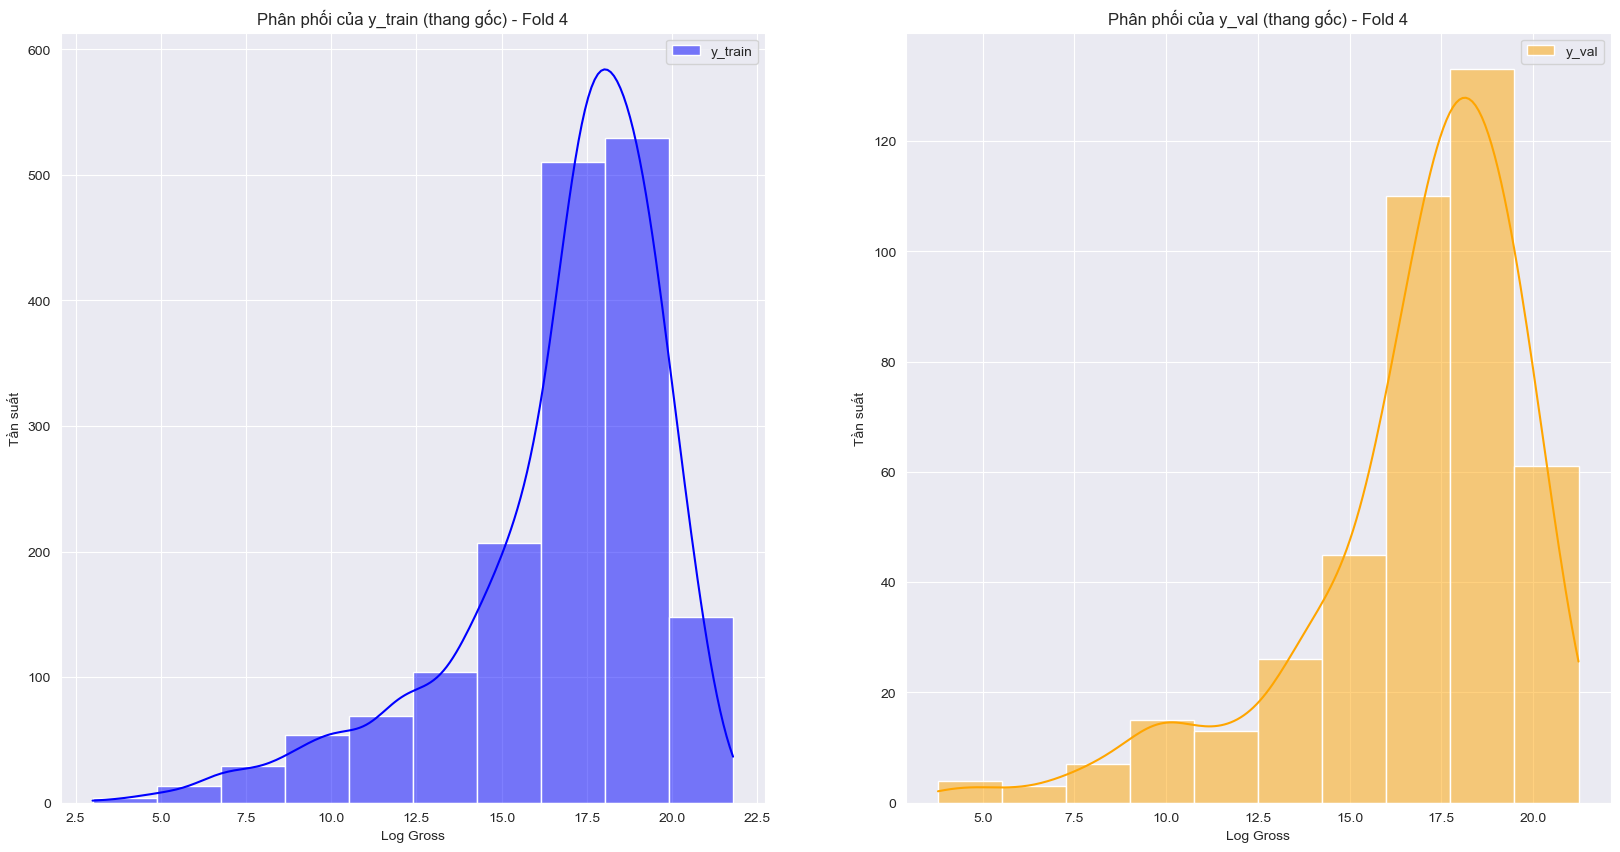

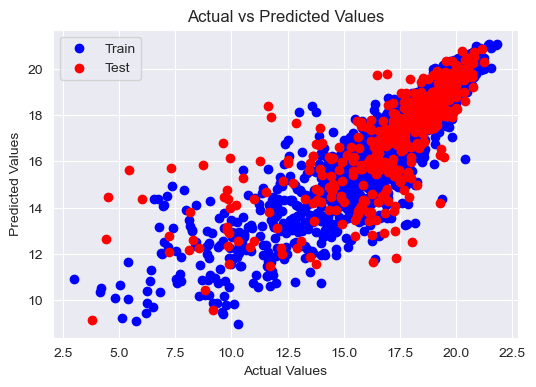

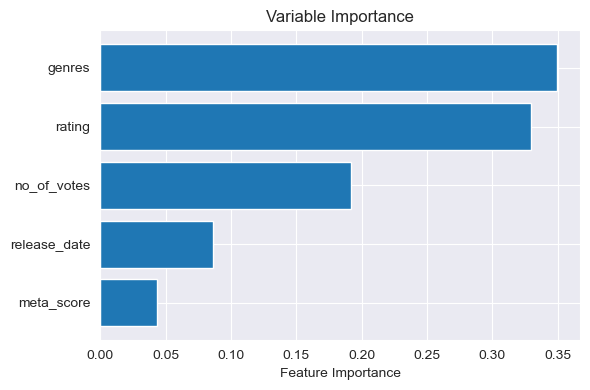


 Fold 5
Fitting 5 folds for each of 864 candidates, totalling 4320 fits
 Best hyperparameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Training Metrics
R2 score: 0.8014
MAE: 50,841,005.3684
MAPE: 6.65%
Test Metrics
R2 score: 0.5689
MAE: 72,545,459.1999
MAPE: 85.82%


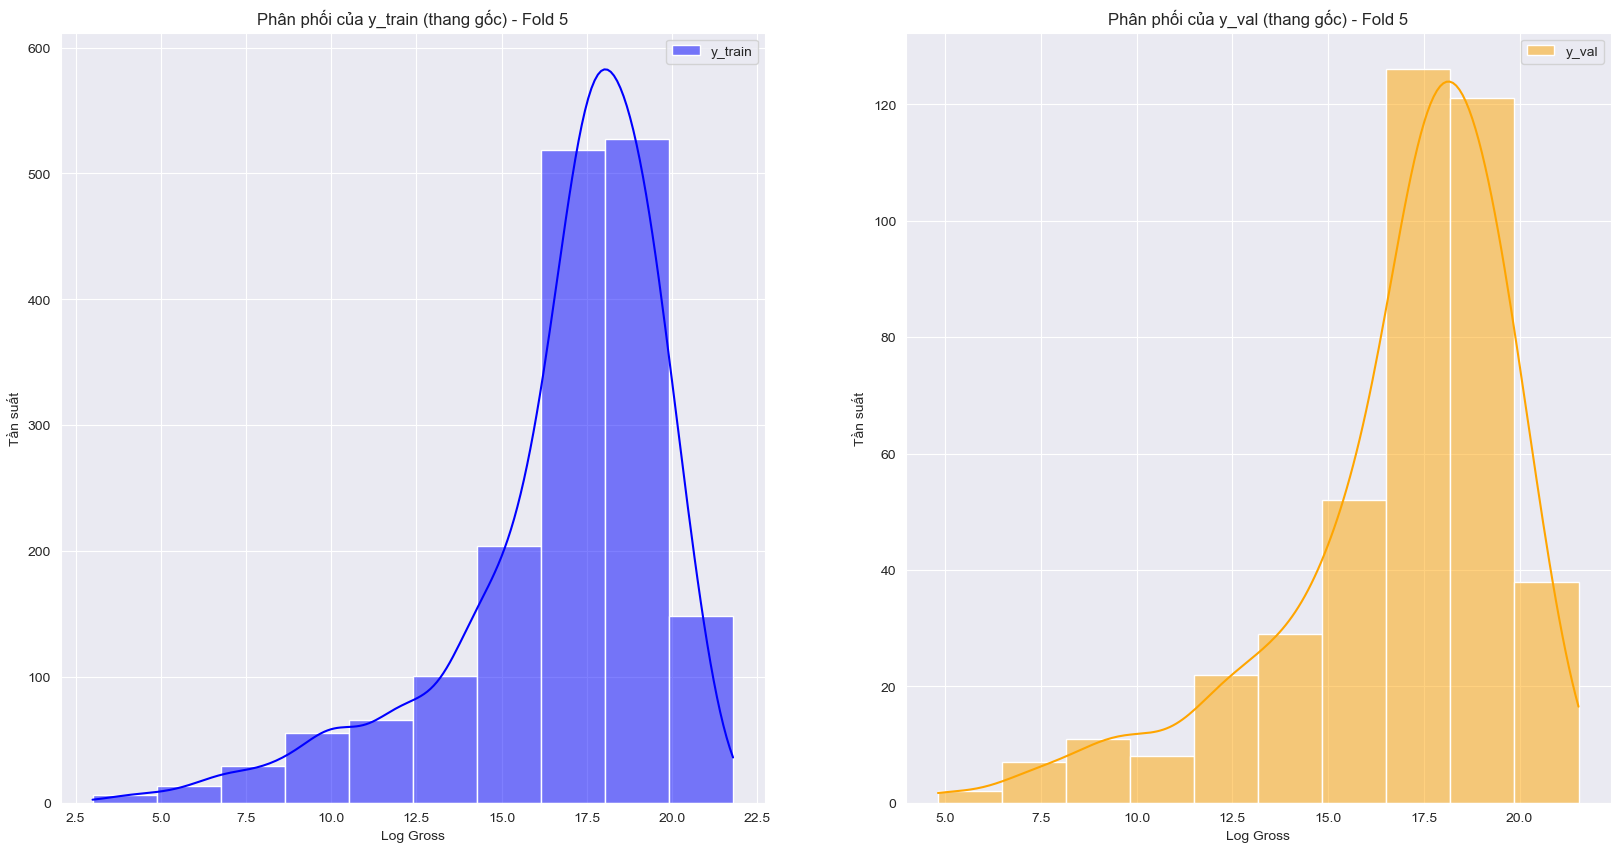

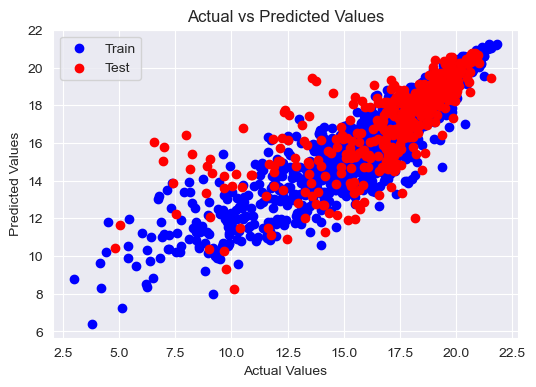

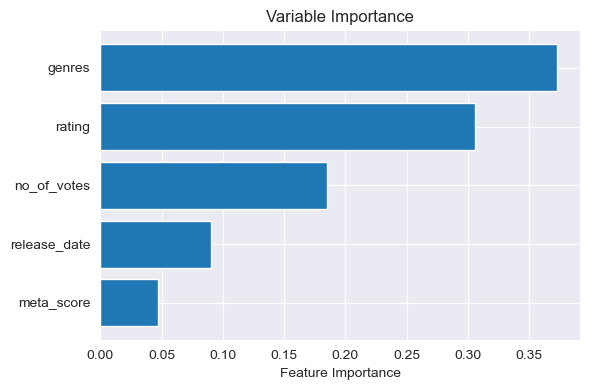

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from evaluation import visualize_results

param_grid = {
    'n_estimators': [100, 200, 300, 500],              # Tăng dần, giúp mô hình ổn định hơn
    'max_depth': [None, 10, 20, 30],                   # None = không giới hạn, nhưng có thể gây overfitting
    'min_samples_split': [2, 5, 10],                   # Giảm overfitting bằng cách yêu cầu nhiều mẫu để chia
    'min_samples_leaf': [1, 2, 4],                     # Tăng lên để tránh overfitting ở lá rất nhỏ
    'max_features': ['sqrt', 'log2', 0.3],             # Số lượng feature được chọn ngẫu nhiên khi split
    'bootstrap': [True, False]                         # False đôi khi giúp giảm bias nhưng tăng variance
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(df, df['log_gross_bin'])):
    print(f"\n Fold {fold + 1}")
    df_train = df.iloc[train_idx].copy()
    df_val = df.iloc[val_idx].copy()

    features = ['log_no_of_votes', 'log_budget',
                'log_genre_stat_feature','log_country_stat_feature','rating']

    target = 'log_gross'


    X_train, y_train, X_val, y_val = processing_data(df_train, df_val, fold=fold,features=features, target=target)

    base_model = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(
        estimator=base_model,
        param_grid=param_grid,
        scoring='neg_mean_absolute_error',
        cv=5,
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    print(" Best hyperparameters:", grid_search.best_params_)

    train_preds = best_model.predict(X_train)
    val_preds = best_model.predict(X_val)

    visualize_results(
        y_train, train_preds,
        y_val, val_preds,
        model=best_model,
        df=df,
        calculate_real_target=True,
    )



 Fold 1
Training Metrics
R2 score: 0.6105
MAE: 59,479,334.9705
MAPE: 9.29%
Test Metrics
R2 score: 0.5427
MAE: 66,709,468.8427
MAPE: 8.58%


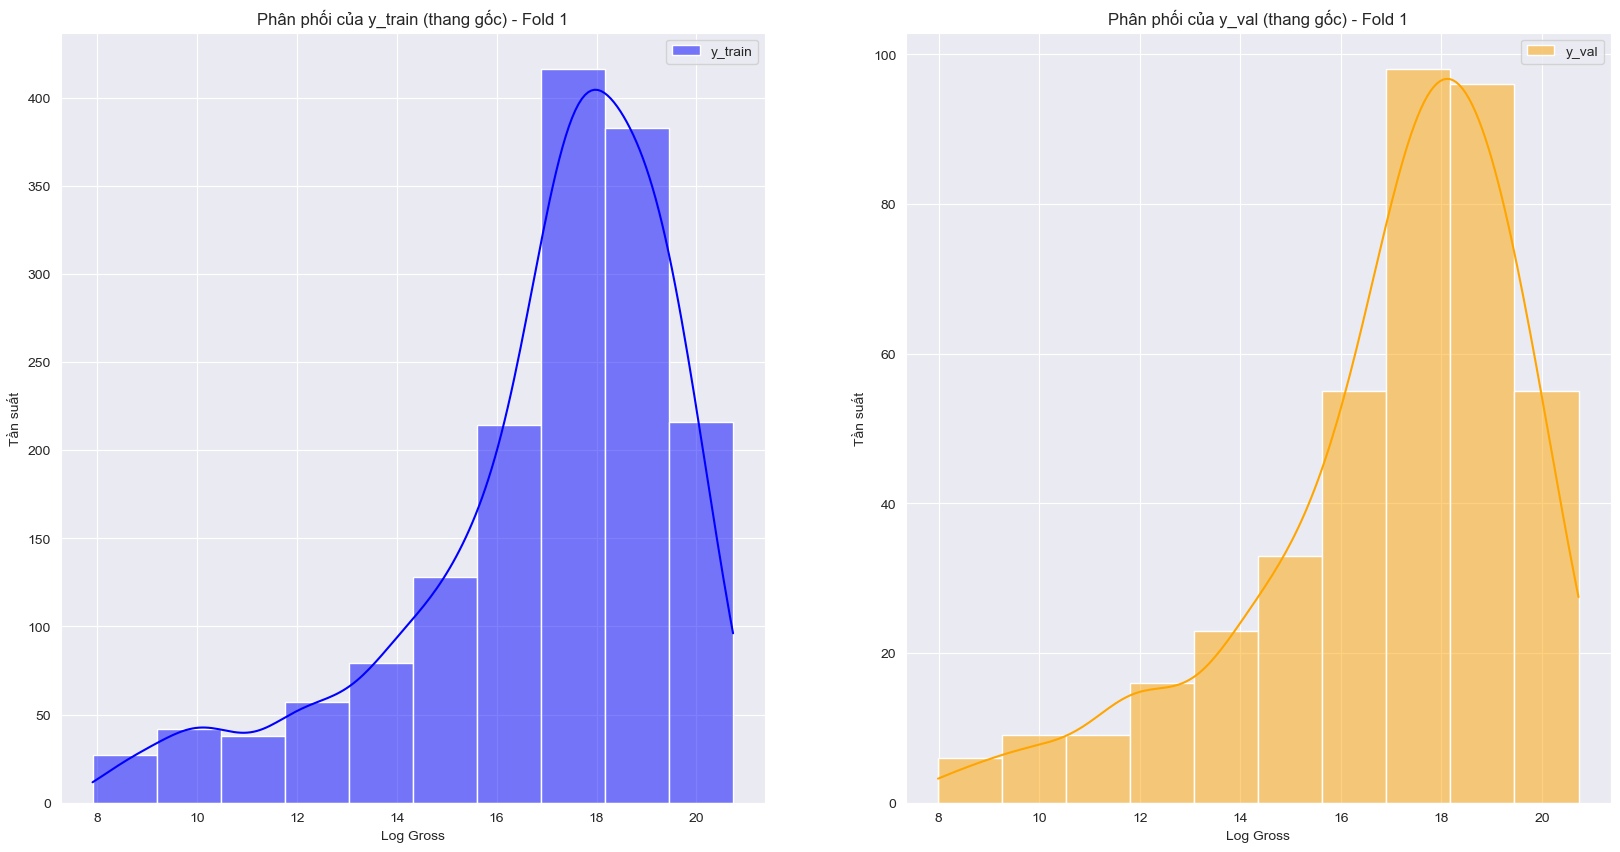

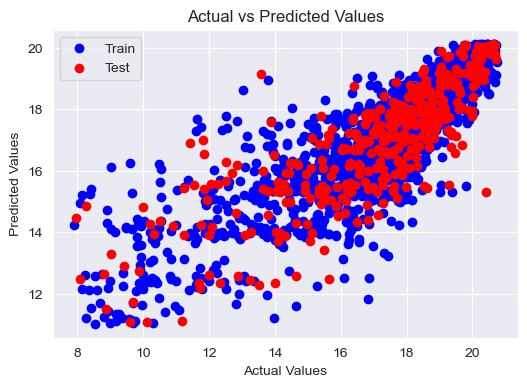

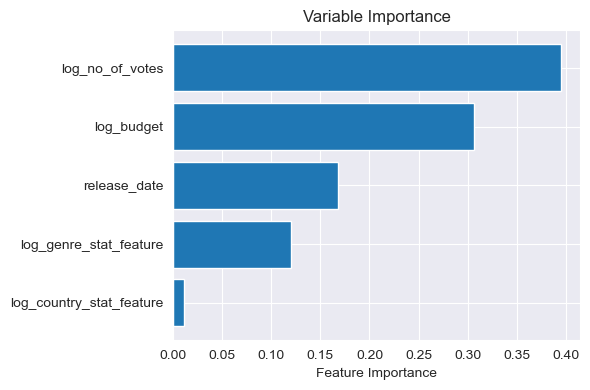


 Fold 2
Training Metrics
R2 score: 0.6077
MAE: 59,485,080.1681
MAPE: 8.83%
Test Metrics
R2 score: 0.5315
MAE: 68,495,383.2395
MAPE: 12.52%


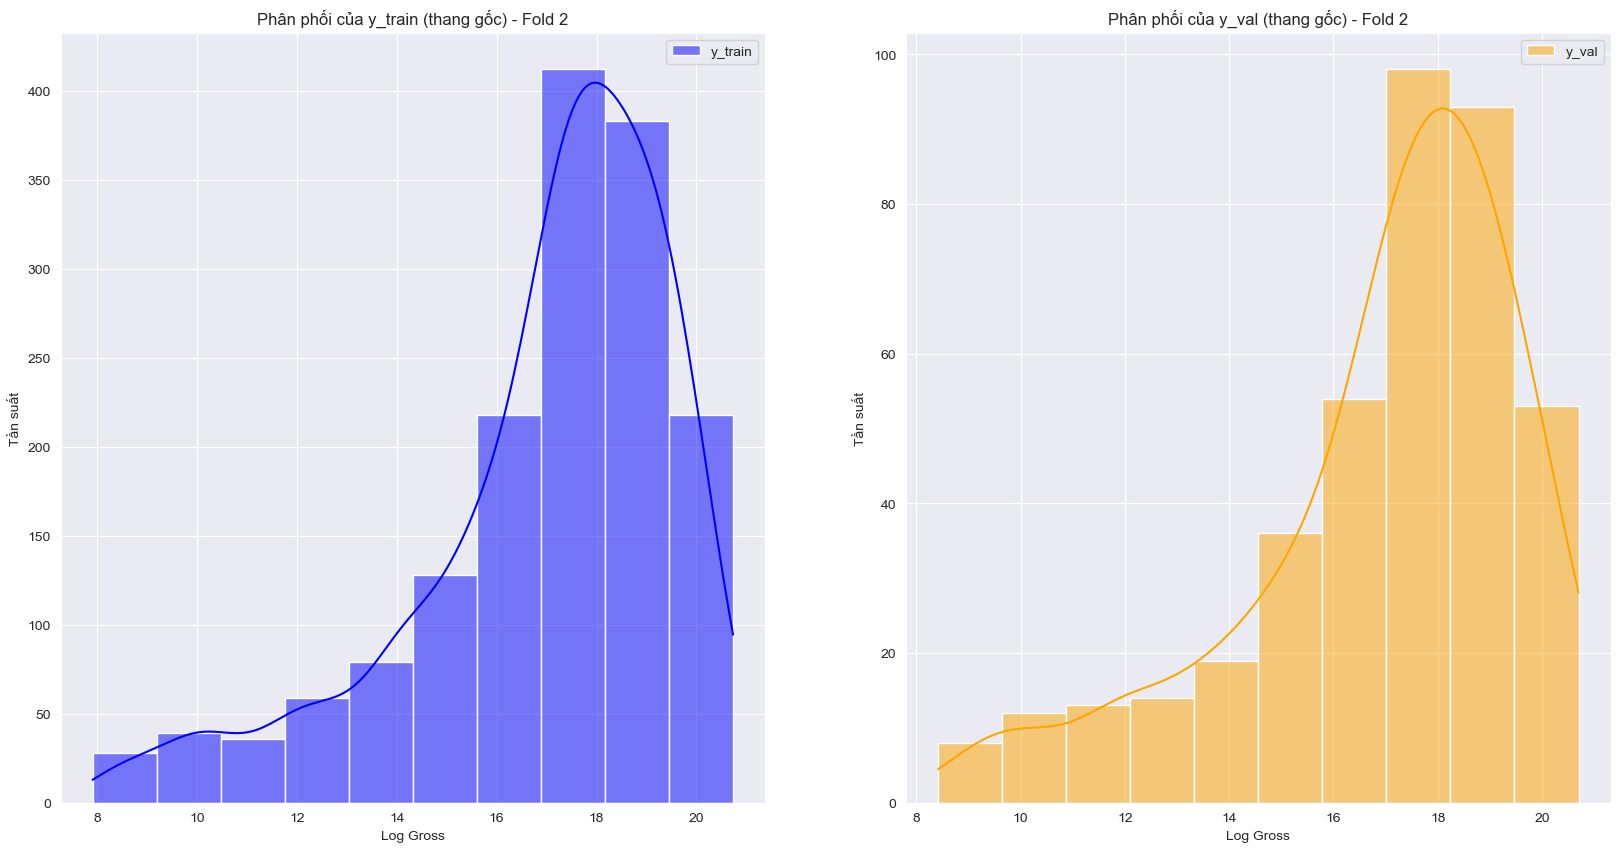

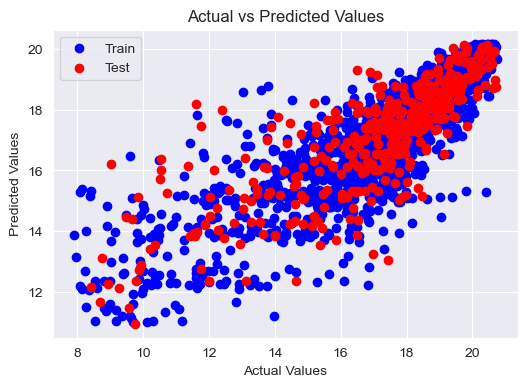

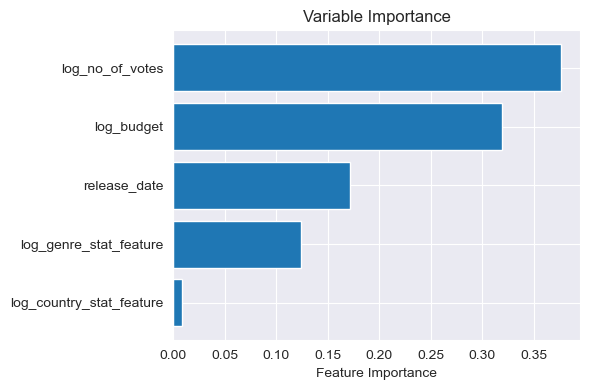


 Fold 3
Training Metrics
R2 score: 0.5818
MAE: 61,427,073.6004
MAPE: 8.11%
Test Metrics
R2 score: 0.6065
MAE: 62,374,090.4351
MAPE: 25.04%


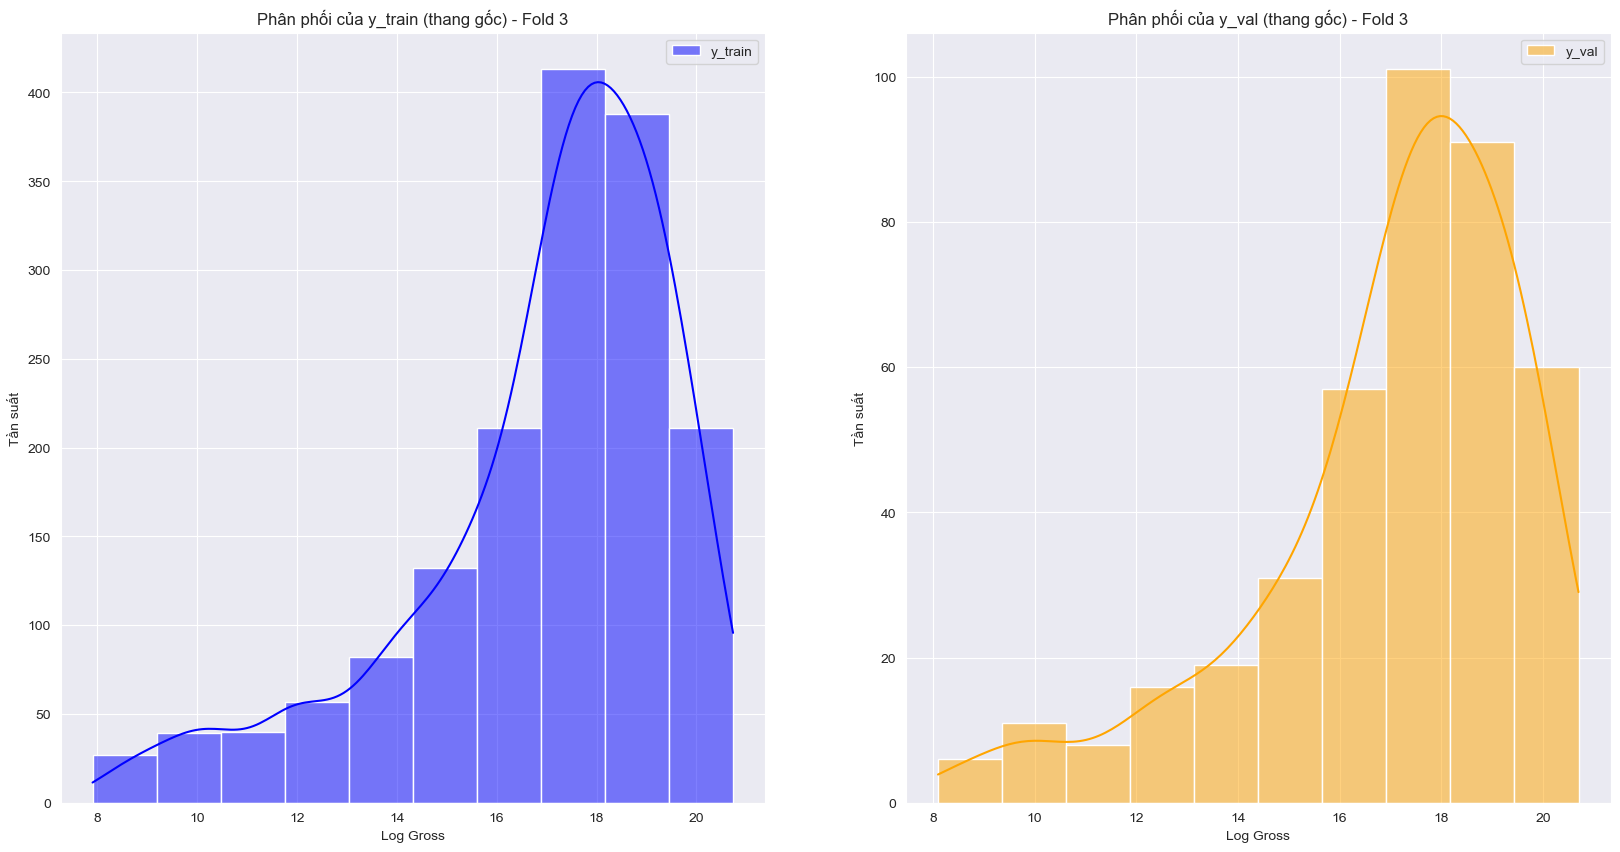

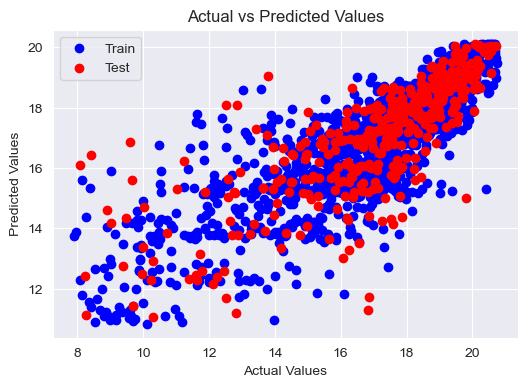

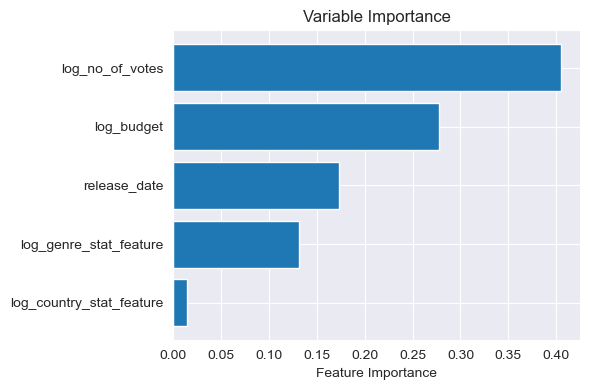


 Fold 4
Training Metrics
R2 score: 0.6005
MAE: 61,373,664.2699
MAPE: 8.46%
Test Metrics
R2 score: 0.5105
MAE: 64,701,639.0059
MAPE: 16.21%


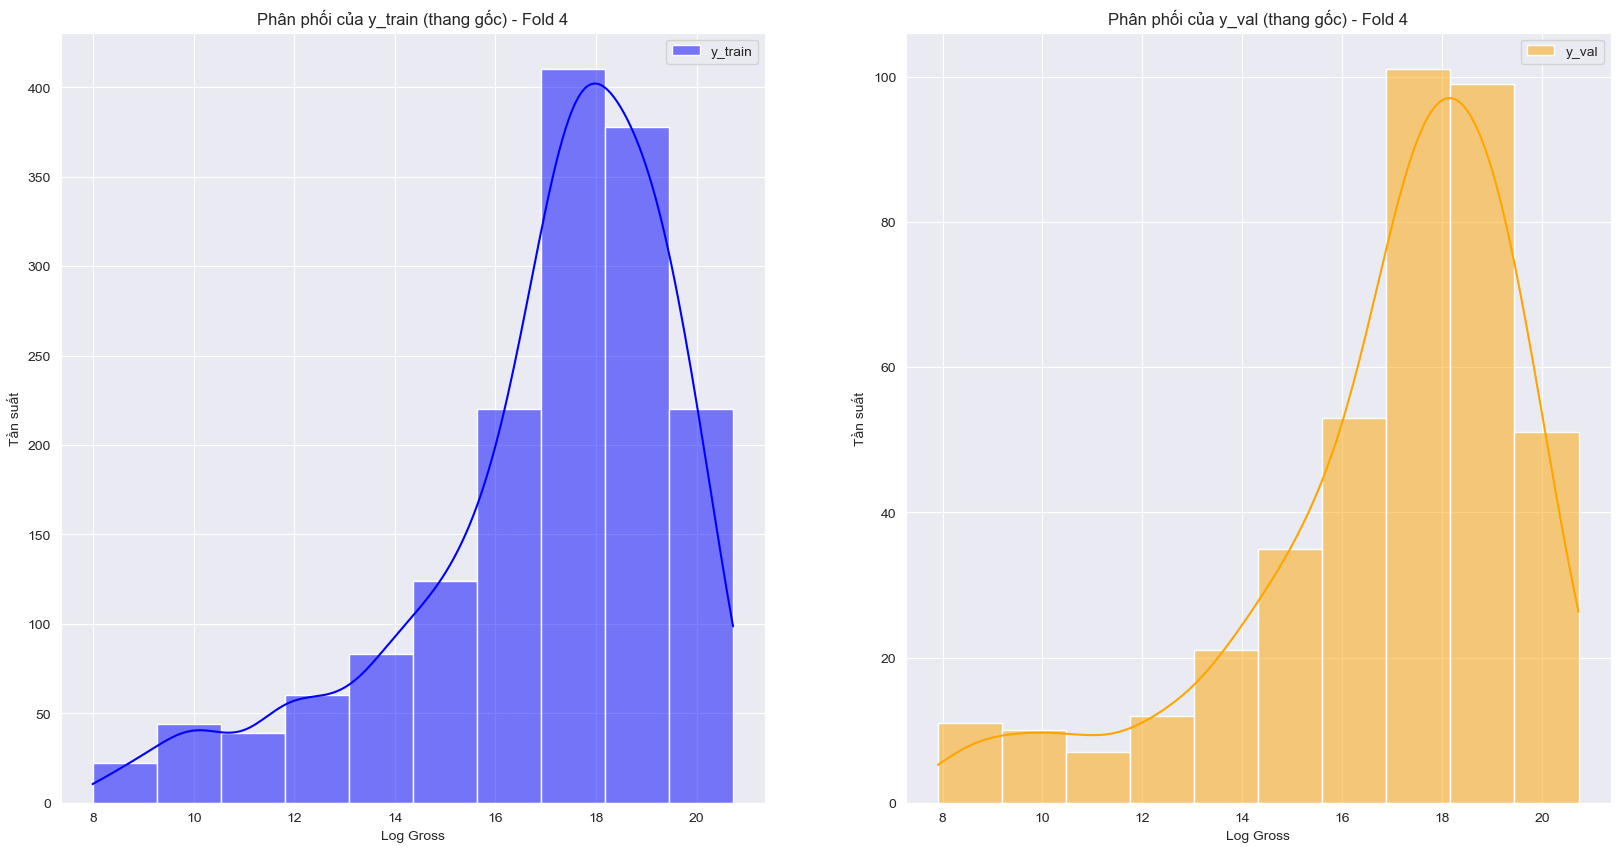

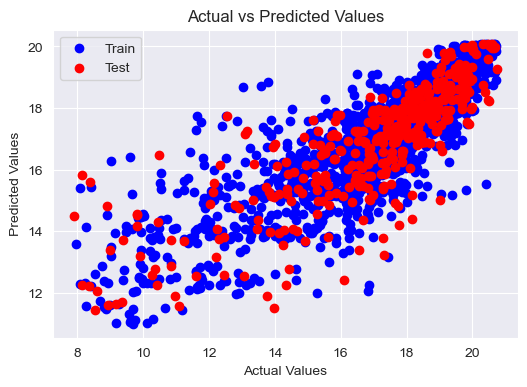

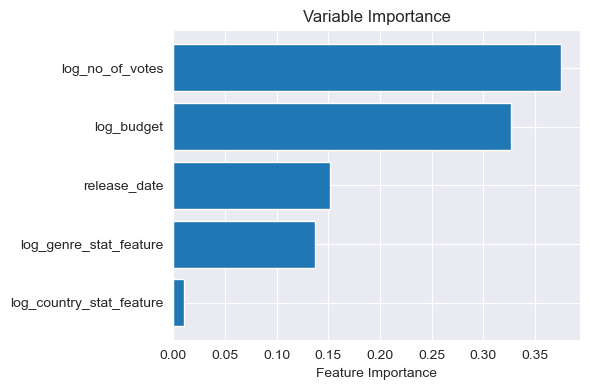


 Fold 5
Training Metrics
R2 score: 0.6050
MAE: 61,172,126.9062
MAPE: 10.58%
Test Metrics
R2 score: 0.5594
MAE: 60,568,422.3770
MAPE: 6.33%


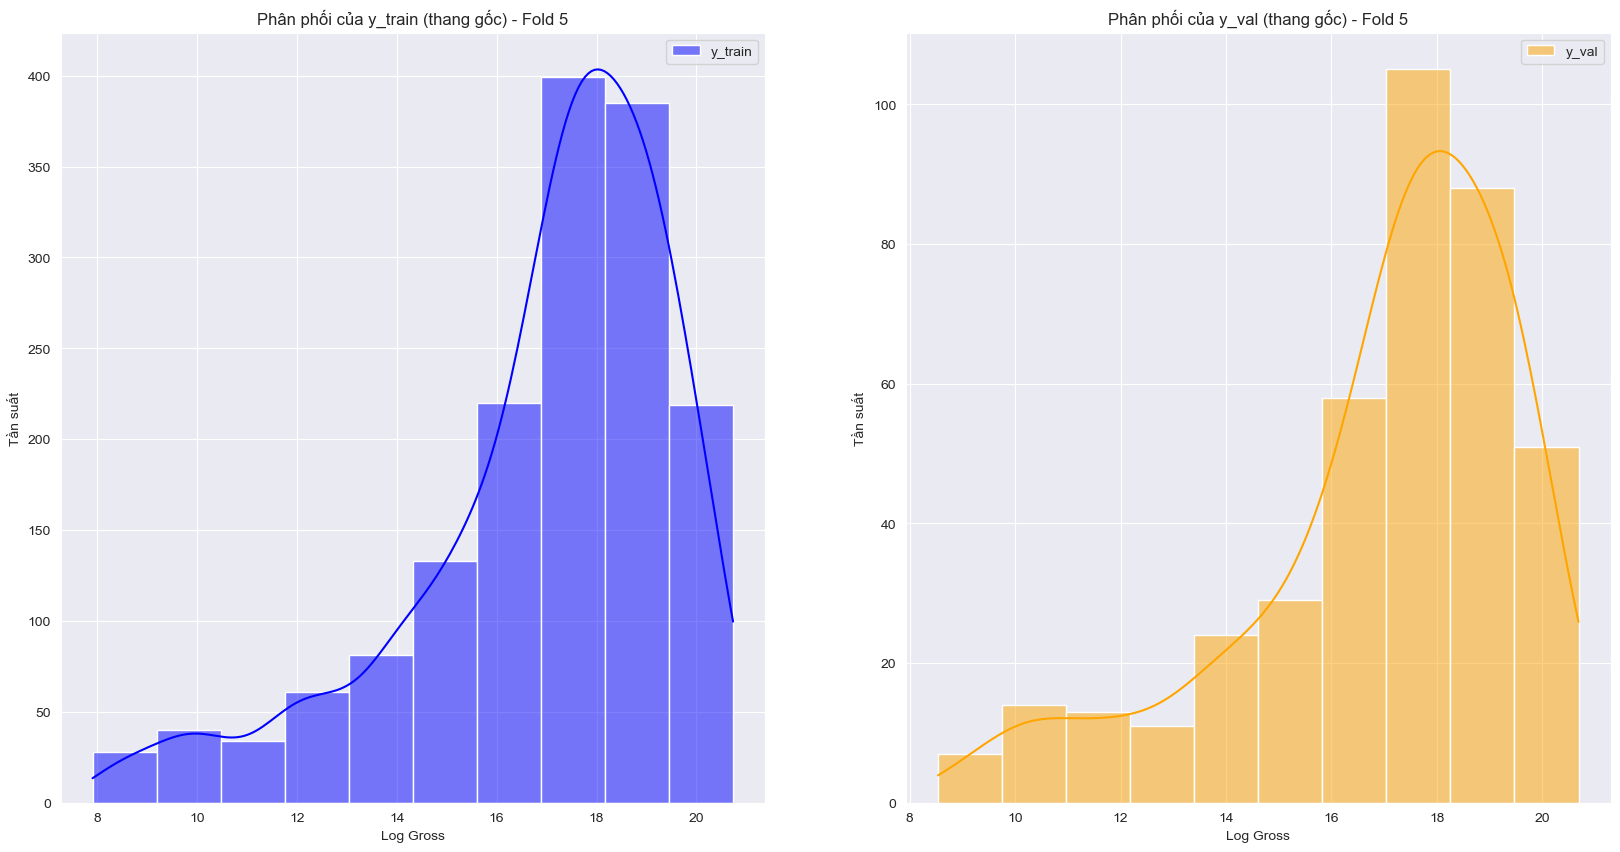

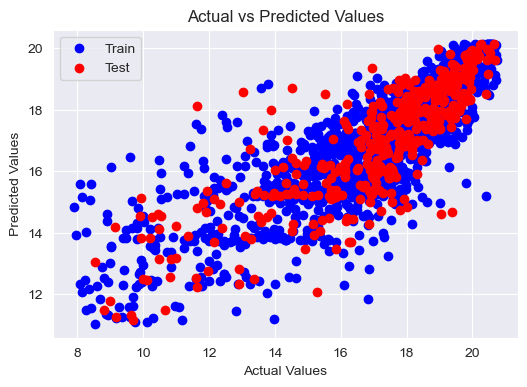

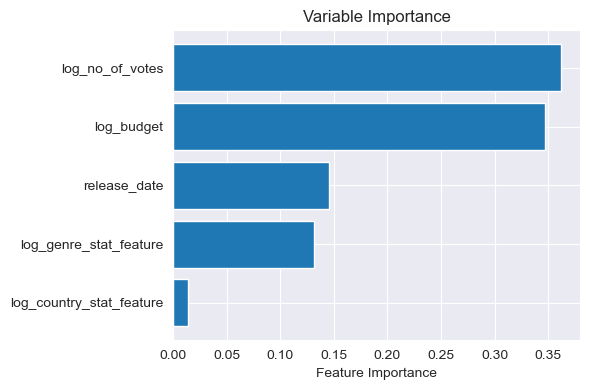

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from evaluation import visualize_results


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(df, df['log_gross_bin'])):
    print(f"\n Fold {fold + 1}")
    df_train = df.iloc[train_idx].copy()
    df_val = df.iloc[val_idx].copy()

    features = ['log_no_of_votes', 'log_budget',
                'log_genre_stat_feature','log_country_stat_feature', 'release_date']

    target = 'log_gross'


    X_train, y_train, X_val, y_val = processing_data(df_train, df_val, fold=fold,features=features, target=target)

    best_model = RandomForestRegressor(random_state=42, bootstrap=True, min_samples_leaf=10, min_samples_split=10, n_estimators=100, max_depth=5, max_samples=0.8, max_features="sqrt")
    best_model.fit(X_train, y_train)


    train_preds = best_model.predict(X_train)
    val_preds = best_model.predict(X_val)

    df_train_processed = pd.DataFrame(X_train, columns=features)
    df_train_processed[target] = y_train

    visualize_results(
        y_train, train_preds,
        y_val, val_preds,
        model=best_model,
        df=df_train_processed,
        calculate_real_target=True,
    )


#### Thư viện Optuna

In [36]:
import optuna
from optuna.visualization import plot_optimization_history, plot_param_importances
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings

# warnings.filterwarnings("ignore")
optuna.logging.set_verbosity(optuna.logging.WARNING)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(df, df['log_gross_bin'])):
    print(f"\nFold {fold + 1}")
    df_train = df.iloc[train_idx].copy()
    df_val = df.iloc[val_idx].copy()

    # Chọn đặc trưng đầu vào và mục tiêu
    #features = ['meta_score', 'rating', 'no_of_votes', 'budget', 'genre_stat_feature', 'country_stat_feature', 'release_date']
    features = ['no_of_votes', 'log_budget',
                'genre_stat_feature','country_stat_feature','rating','release_date']

    target = 'log_gross'

    X_train, y_train, X_val, y_val = processing_data(df_train, df_val, fold=fold,features=features, target=target)

    def objective(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 100, 500),
            'max_depth': trial.suggest_categorical('max_depth', [5, 10, 20, None]),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
            'max_features': trial.suggest_categorical('max_features', ['sqrt']),
            'bootstrap': trial.suggest_categorical('bootstrap', [True]),
            'random_state': 42,
            'n_jobs': -1
        }

        model = RandomForestRegressor(**params)
        score = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=3).mean()
        return -score  # minimize MSE

    #  Tạo study với tên rõ ràng theo từng fold
    study = optuna.create_study(direction="minimize", study_name=f"Fold_{fold+1}_RandomForest")
    study.optimize(objective, n_trials=30)

    print(" Best hyperparameters:", study.best_params)
    print(" Best MSE:", study.best_value)

    best_model = RandomForestRegressor(**study.best_params, random_state=42, n_jobs=-1)
    best_model.fit(X_train, y_train)

    train_preds = best_model.predict(X_train)
    val_preds = best_model.predict(X_val)

    #  Vẽ biểu đồ tối ưu và tầm quan trọng tham số
    print(" Hiển thị quá trình tối ưu:")
    plot_optimization_history(study).show()
    plot_param_importances(study).show()

    visualize_results(
        y_train, train_preds,
        y_val, val_preds,
        model=best_model,
        df=df,
        calculate_real_target=True,
    )



Fold 1


[W 2025-05-08 23:34:22,288] Trial 13 failed with parameters: {'n_estimators': 445, 'max_depth': None, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': True} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "C:\Users\huynh\.conda\envs\movie-analyst\Lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\huynh\AppData\Local\Temp\ipykernel_28044\2327866605.py", line 41, in objective
    score = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=3).mean()
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\huynh\.conda\envs\movie-analyst\Lib\site-packages\sklearn\utils\_param_validation.py", line 216, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\huynh\.conda\envs\movie-analyst\Lib\

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001AFC614C720> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 